<a href="https://colab.research.google.com/github/lauramsromano/DataScience_ML_PVendas/blob/main/DS_ML_PV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [6]:
#Importando as bibliotecas para visualização e tratamento de dados:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Importando o arquivo com os dados:
ad = pd.read_csv("advertising.csv")

In [7]:
#Verificando os dados presentes no arquivo:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

In [8]:
#Calculando a correlação entre as variaveis presentes:
ad.corr()

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


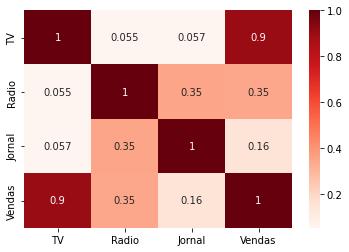

In [9]:
#Visualizando a correlação em um heatmap (Mapa de Calor):
sns.heatmap(ad.corr(), cmap="Reds",annot=True)
plt.show;

Verificamos que há uma **correlação alta (0.9)** entre as variáveis Venda e TV, uma **correlação baixa (0.35)** entre as variáveis Venda e Rádio e uma **correlação extremanente baixa (0.16)** entre as variáveis Venda e Jornal. 

Com isso, podemos concluir que TV se mostra como um produto com alto potencial de venda em relação aos produtos Rádio e Jornal.

-------------------------------


#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [10]:
y = ad['Vendas'] #variável a ser prevista.
x = ad[['TV', 'Radio', 'Jornal']]

#Separação entre dados de treino e dado de teste:
from sklearn.model_selection import train_test_split 
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.3, random_state=1)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [11]:
#Importando bilbioteca de Machine Learning (MC): 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 

#Criando as MC conforme técnicas escolhidas:
md_r_linear = LinearRegression() #regressão linear
md_arv_dec = RandomForestRegressor() #árvore de decisão

#Treinando os testes com as MC criadas:
md_r_linear.fit(x_treino, y_treino)
md_arv_dec.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [12]:
#Testando os dados de teste nas MC treinadas anteriormente:
previsao_r_l = md_r_linear.predict(x_teste)
previsao_arv_d = md_arv_dec.predict(x_teste)

#Validando as previsão com o R² (coeficiente de determinação):
from sklearn.metrics import r2_score
print(r2_score(y_teste, previsao_r_l)) 
print(r2_score(y_teste, previsao_arv_d)) 

0.9071151423684273
0.9673208526571908


Verificamos pelo coeficiente de determinação R² que entre os modelos escolhidos o modelo de RandomForest (Árvore de Decisão) obteve um maior sucesso em suas previsões, apresentando um valor de **0.96 (96% de precisão)** em comparação a Regressão Linear, apresentando um valor de **0.90 (90% de precisão)**

-----------------------------

#### Visualização Gráfica das Previsões

In [36]:
#Criação de df (dataframe) para visualização gráfica das previsões:
ad_auxiliar = pd.DataFrame()
ad_auxiliar['y_teste'] = y_teste
ad_auxiliar['Previsão Regressão Linear'] = previsao_r_l
ad_auxiliar['Previsão Árvore de Decisão'] = previsao_arv_d

ad_auxiliar.head() #vendo os 5 primeiros dados da tabela

,y_teste,Previsão Regressão Linear,Previsão Árvore de Decisão
58,23.8,21.288161,23.259
40,16.6,18.042132,17.821
34,11.9,10.059590,12.419
102,19.8,21.082241,17.971
184,17.6,20.764760,20.187


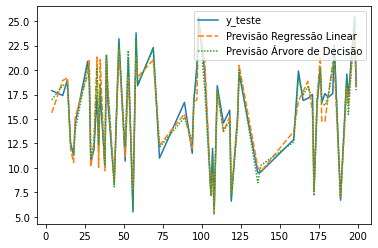

In [34]:
#Gráfico de linhas mostrandos os valores de teste e os valores encontrados nas previsões:
sns.lineplot(data=ad_auxiliar)
plt.show()

#### Como fazer uma nova previsão?

In [14]:
#Importando novos dados para realizar as previsões:
nv = pd.read_csv("novos.csv")
nv

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [15]:
#Realizando as previsões com a MC treinada com a técnica de árvode de decisão (Random Forest):
previsao_nv = md_arv_dec.predict(nv)
previsao_nv

array([ 7.532,  8.535, 20.1  ])

In [21]:
#Adicionando os valores na tabela com uma nova coluna:
nv['Prev. de Venda'] = previsao_nv

In [33]:
#Verificando a tabela final com os novos dados e as previsões de venda:
nv

,TV,Radio,Jornal,Prev. de Venda
0,23.1,3.8,69.2,7.532
1,44.5,0.0,5.1,8.535
2,170.2,45.9,0.0,20.100
